In [1]:
import matplotlib.pyplot as plt
from src.invert_c_theta import Invert
import pandas as pd
import firedrake

2025-03-06 03:21:36.775334: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-06 03:21:36.779202: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-06 03:21:36.800880: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1741231296.820214   95492 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1741231296.826255   95492 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-06 03:21:36.846906: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

In [2]:
# drichlet_ids = [1,2,5,6,7,8,9,10,11] #dotson-crosson.geojson
# drichlet_ids = [1,2,3,4,5,6,7,9,10,11,12,13,14,15] #dotson-crosson-v1.geojson
drichlet_ids = [1,2,4,6,7,8,9,10,11]
side_ids = []
invert_dotson = Invert(outline = 'data/geojson/dotson-crosson.geojson', mesh_name = 'dotson',reg_constant_c  = 0.05, read_mesh = False,opts = None, drichlet_ids = drichlet_ids , lcar = 9e3)

Reading local outline
Creating mesh
Reading mesh
Reading bedmachine data
Initializing function spaces
Initializing 3d function spaces
Initializing fields
Defining friction law
Setting ramp power to :  1
Initializing heat transport


(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='UPS x [m]', ylabel='UPS y [m]'>)

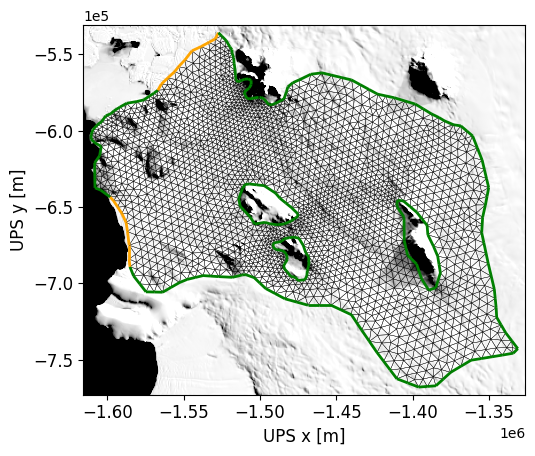

In [3]:
def plot_mesh():
    fig, axes = invert_dotson.plot_bounded_antarctica()
    
    # Set x-label, y-label and their font sizes
    axes.set_xlabel("UPS x [m]", fontsize=12)  # Adjust font size for x-axis label
    axes.set_ylabel("UPS y [m]", fontsize=12)  # Adjust font size for y-axis label

    # Set tick label sizes
    axes.tick_params(axis='x', labelsize=12)  # Adjust font size for x-ticks
    axes.tick_params(axis='y', labelsize=12)  # Adjust font size for y-ticks
    
    kwargs = {
        "interior_kw": {"linewidth": 0.25},
        "boundary_kw": {"linewidth": 2},
    }
    
    firedrake.triplot(invert_dotson.get_mesh(), axes=axes, **kwargs)
    
    # We need to define just two labels, for drichlet ids and terminus
    new_labels = ['drichlet id', 'terminus']
    new_handles = []

    # Set up the color mapping for the two labels
    drichlet_color = 'green'
    terminus_color = 'orange'
    
    # Get the existing handles and labels from the plot
    handles, labels = axes.get_legend_handles_labels()

    # Create two separate handles for drichlet_id and terminus, and set their colors
    drichlet_handle = None
    terminus_handle = None

    # Iterate over the handles and labels to find matching labels and set colors
    for handle, label in zip(handles, labels):
        if int(label) in drichlet_ids:  # Check if it's a Dirichlet boundary
            if drichlet_handle is None:
                drichlet_handle = handle
            handle.set_color(drichlet_color)
        else:  # Otherwise it's a terminus
            if terminus_handle is None:
                terminus_handle = handle
            handle.set_color(terminus_color)

    # If no handle was found for drichlet or terminus, create new ones
    if drichlet_handle is None:
        drichlet_handle = handles[0]  # Assign the first handle (adjust if needed)
        drichlet_handle.set_color(drichlet_color)
    if terminus_handle is None:
        terminus_handle = handles[1]  # Assign the second handle (adjust if needed)
        terminus_handle.set_color(terminus_color)

    # Add the updated handles with the correct color to the legend
    new_handles = [drichlet_handle, terminus_handle]
    
    # Add the legend with the two new labels and adjust font size
    #axes.legend(new_handles, new_labels, loc='best', fontsize=12)  # Set legend font size here
    
    return fig, axes


plot_mesh()

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='meters'>)

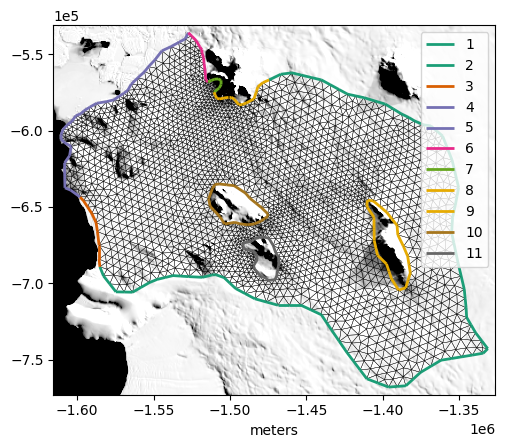

In [4]:
invert_dotson.plot_mesh()

In [5]:
invert_dotson.import_velocity_data(constant_val=0.01)

Reading velocity from measures database
C0 is constant: 0.01
Defining friction law


In [6]:
invert_dotson.import_geophysics_data(name_list=['data/geophysics/ADMAP_MagneticAnomaly_5km.tif', 
                                                'data/geophysics/ANTGG_BouguerAnomaly_10km.tif', 
                                                'data/geophysics/GeothermalHeatFlux_5km.tif',
                                                'data/geophysics/ALBMAP_SurfaceAirTemperature_5km.tif',
                                                'data/geophysics/EIGEN-6C4_GravityDisturbance_10km.tif',
                                                'data/geophysics/ALBMAP_SnowAccumulation_Arthern_5km.tif',
                                                'data/geophysics/Englacial_temp_Pattyn_2013.tif',])

Defining friction law
using englacial temperature for rate factor
Geophysics data imported


(<Figure size 640x480 with 2 Axes>,
 <Axes: title={'center': 'Englacial Temperature'}, xlabel='meters'>)

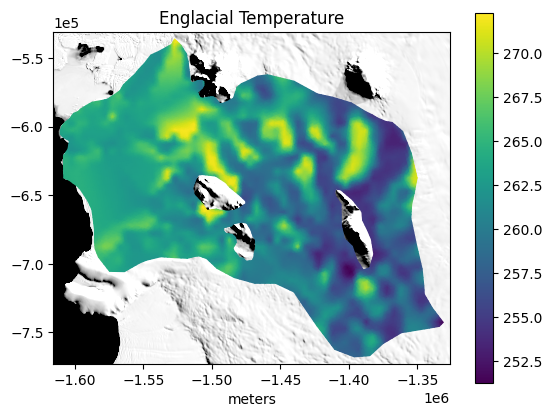

In [7]:
invert_dotson.plot_englacial_temp()

In [8]:
invert_dotson.invert_C(max_iterations=300, regularization_grad_fcn= True, loss_fcn_type = 'nosigma')

Using loss function without sigma

Truncated CG Trust-Region Solver
  iter  value          gnorm          snorm          delta          #fval     #grad     tr_flag   iterCG    flagCG    
  0     2.400498e+08   1.251622e+04                  2.009472e+04   
  1     8.229823e+07   4.485723e+03   2.009472e+04   5.023681e+04   3         2         0         2         3         
  2     1.451152e+07   6.606374e+02   5.023681e+04   5.023681e+04   4         3         0         2         2         
  3     3.004661e+06   1.263595e+02   5.023681e+04   1.255920e+05   5         4         0         3         2         
  4     3.004661e+06   1.263595e+02   1.255920e+05   7.849501e+03   6         4         2         3         2         
  5     2.218169e+06   8.158750e+01   7.849501e+03   1.962375e+04   7         5         0         1         3         
  6     1.154273e+06   3.643534e+01   1.962375e+04   4.905938e+04   8         6         0         1         3         
  7     3.254511e+05   9.59780

In [9]:
u_optimized =  invert_dotson.simulation()

In [10]:
firedrake.assemble(invert_dotson.loss_functional_nosigma(u_optimized))
# reg 0.05: 1248.372044290589
# reg 0.1: 272914.6617231659


1300.221281296349

(<Figure size 640x480 with 2 Axes>,
 <Axes: xlabel='UPS x [m]', ylabel='UPS y [m]'>)

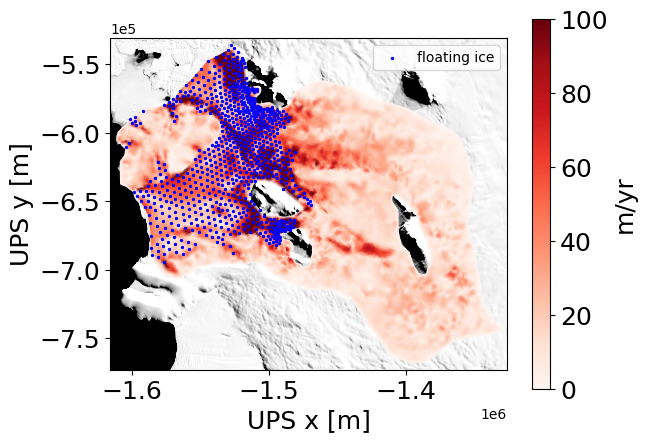

In [11]:
invert_dotson.plot_u_error_no_sigma(u_optimized, vmax = 100)

(<Figure size 640x480 with 2 Axes>,
 <Axes: title={'center': '% Error in U'}, xlabel='meters'>)

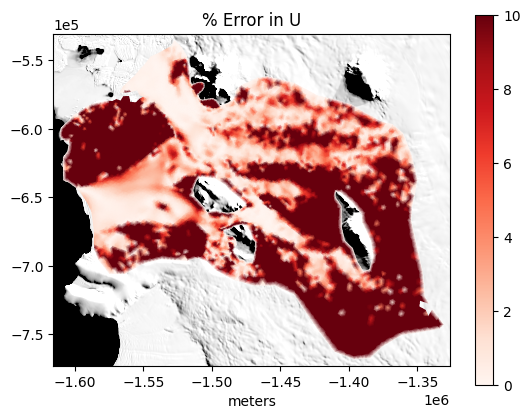

In [12]:
invert_dotson.plot_u_error_percentage(u_optimized, vmax = 10)
#c_reg 0.1 : 6091.553804840353  # 1048.1822885449558
#c_reg 1 : 920.1322010148269

In [13]:
C_optimized = invert_dotson.get_C()

(<Figure size 640x480 with 2 Axes>, <Axes: xlabel='UPS x [m]'>)

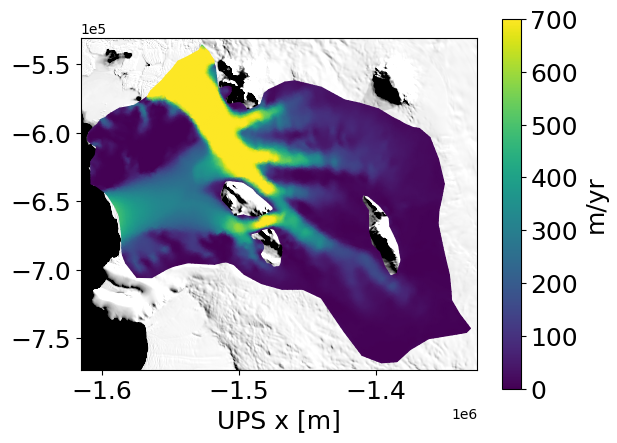

In [14]:
invert_dotson.plot_u_mag(u_optimized, vmax=700)

(<Figure size 640x480 with 2 Axes>,
 <Axes: title={'center': 'Surface velocity streamlines'}, xlabel='meters'>)

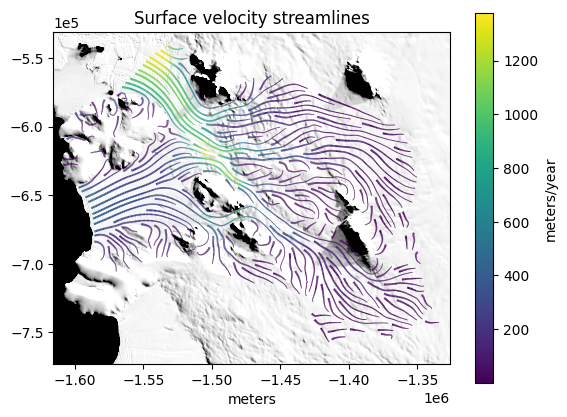

In [15]:
invert_dotson.plot_streamline_u(u_optimized)

(<Figure size 640x480 with 2 Axes>, <Axes: xlabel='UPS x [m]'>)

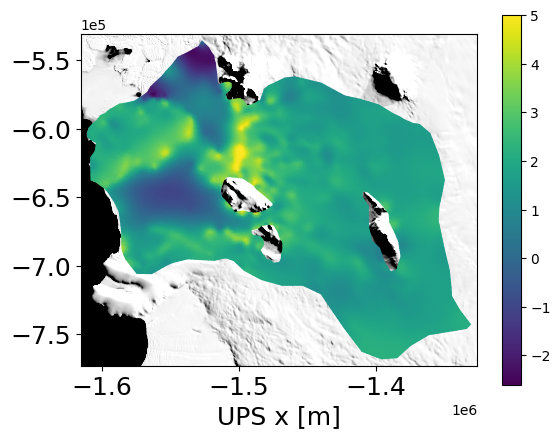

In [21]:
invert_dotson.plot_C(vmax = 5, title = None)

(<Figure size 640x480 with 2 Axes>,
 <Axes: title={'center': '$C_{b}$'}, xlabel='meters'>)

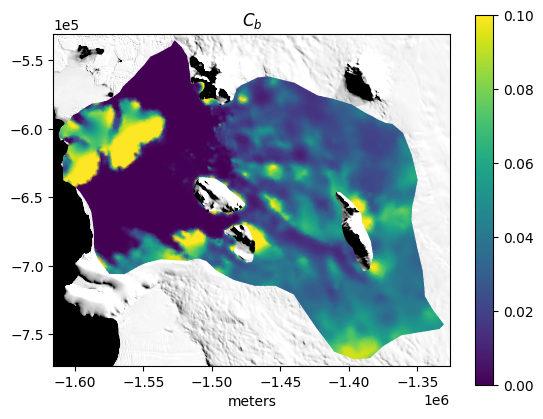

In [17]:
invert_dotson.plot_C_total(vmax = 0.1)

(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'Grounding Line'}, xlabel='meters'>)

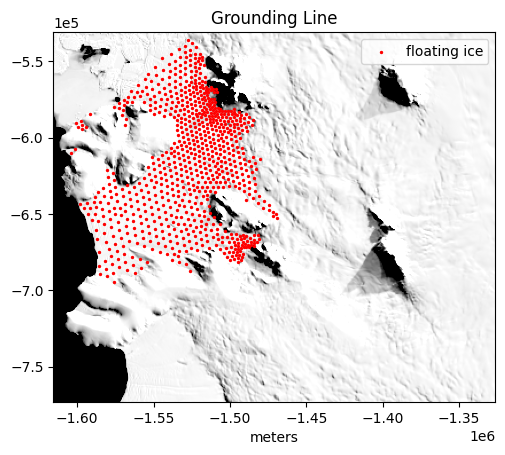

In [18]:
invert_dotson.plot_grounding_line()

In [19]:
#invert_dotson.inverse_u = invert_dotson.u_initial
invert_dotson.inverse_u = u_optimized

In [20]:
#theta = invert_dotson.θ
C = invert_dotson.C

In [22]:
df = invert_dotson.get_dataframe(u_optimized)
df.to_csv('regularized_const_01C_C_only_englacial_temp_dotson_r005_geo_12.csv')

In [41]:
invert_dotson.compute_C_ML_regress(filename = 'model_4_dotson2_thwaites1_r1_geo_static', half = False, flip = False, use_driving_stress = False, C_bounds = [-50, 55], θ_bounds =[-102, 200], number_of_models = 14)
u_optimized =  invert_dotson.simulation()

/home/firedrake/firedrake/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator MinMaxScaler from version 1.5.1 when using version 1.4.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


287/287 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


/home/firedrake/firedrake/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator MinMaxScaler from version 1.5.1 when using version 1.4.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


287/287 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


/home/firedrake/firedrake/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator MinMaxScaler from version 1.5.1 when using version 1.4.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


287/287 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


/home/firedrake/firedrake/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator MinMaxScaler from version 1.5.1 when using version 1.4.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


287/287 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


/home/firedrake/firedrake/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator MinMaxScaler from version 1.5.1 when using version 1.4.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


287/287 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


/home/firedrake/firedrake/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator MinMaxScaler from version 1.5.1 when using version 1.4.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


287/287 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


/home/firedrake/firedrake/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator MinMaxScaler from version 1.5.1 when using version 1.4.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


287/287 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


/home/firedrake/firedrake/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator MinMaxScaler from version 1.5.1 when using version 1.4.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


287/287 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


/home/firedrake/firedrake/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator MinMaxScaler from version 1.5.1 when using version 1.4.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


287/287 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


/home/firedrake/firedrake/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator MinMaxScaler from version 1.5.1 when using version 1.4.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


287/287 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


/home/firedrake/firedrake/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator MinMaxScaler from version 1.5.1 when using version 1.4.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


287/287 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


/home/firedrake/firedrake/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator MinMaxScaler from version 1.5.1 when using version 1.4.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


287/287 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


/home/firedrake/firedrake/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator MinMaxScaler from version 1.5.1 when using version 1.4.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


287/287 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


/home/firedrake/firedrake/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator MinMaxScaler from version 1.5.1 when using version 1.4.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


287/287 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


In [42]:
firedrake.assemble(invert_dotson.loss_functional_nosigma(u_optimized))
# 23318.11004467756

85091.59402140504

In [43]:
df = invert_dotson.get_dataframe(u_optimized)
df.to_csv('dotson_ML_geo_4_static_2_1.csv')

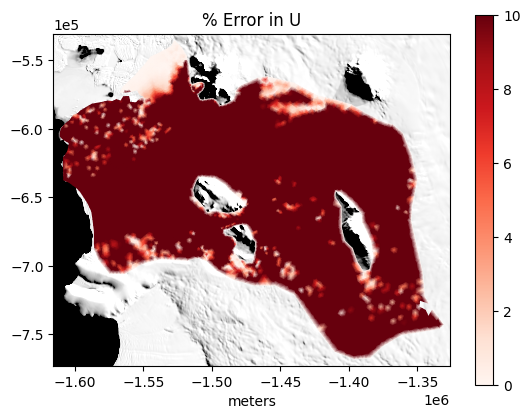

In [44]:
invert_dotson.plot_u_error_percentage(u_optimized)

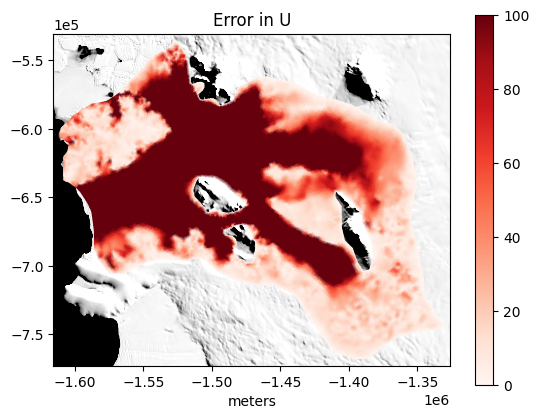

In [45]:
invert_dotson.plot_u_error_no_sigma(u_optimized, vmax = 100)

In [46]:
invert_dotson.ML_u = u_optimized

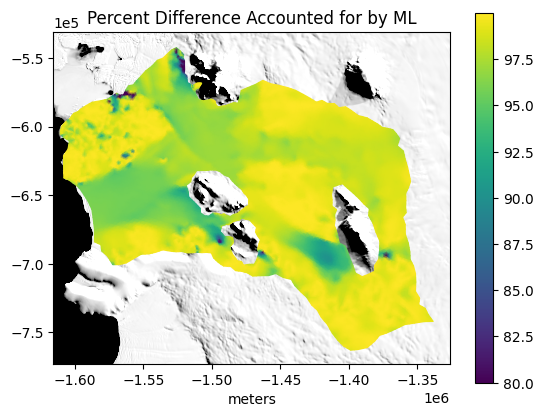

In [47]:
#Static2_1
invert_dotson.plot_percent_accounted(vmin = 80)

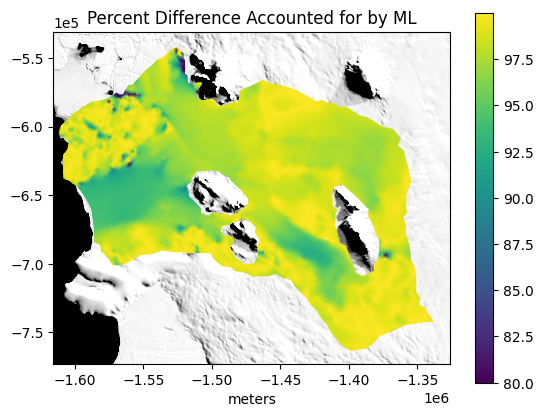

In [30]:
#Dynamic2_1
invert_dotson.plot_percent_accounted(vmin = 80)

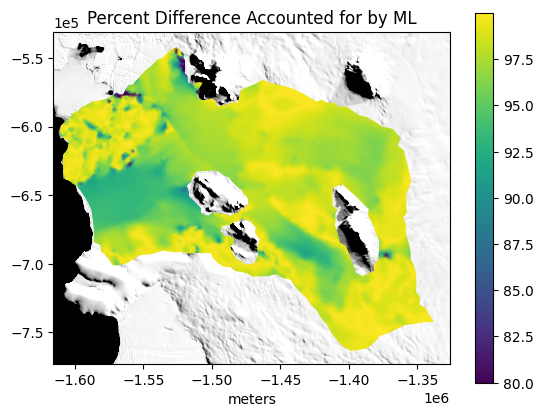

In [52]:
#Dynamic
invert_dotson.plot_percent_accounted(vmin = 80)

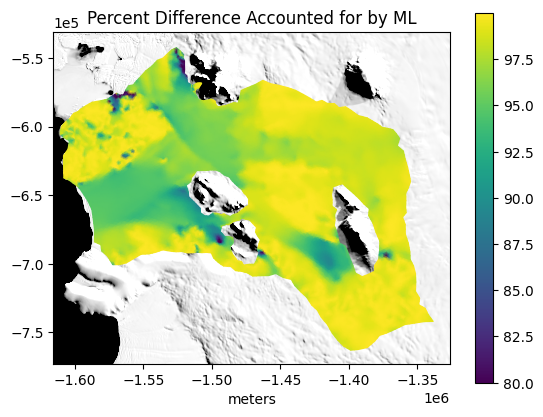

In [41]:
#Static
invert_dotson.plot_percent_accounted(vmin = 80)

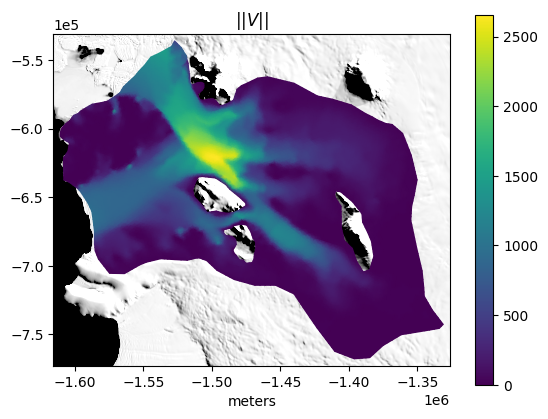

In [31]:
invert_dotson.plot_u_mag(invert_dotson.ML_u)

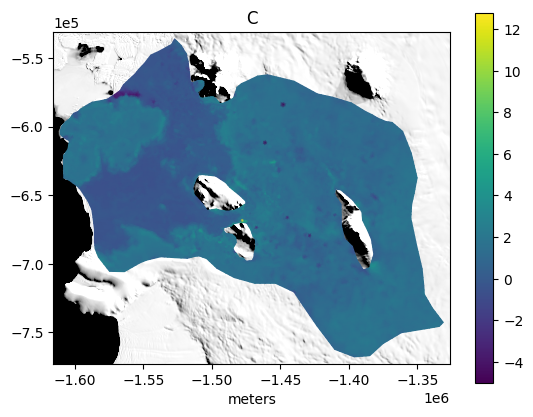

In [32]:
invert_dotson.plot_C(vmin = -5)

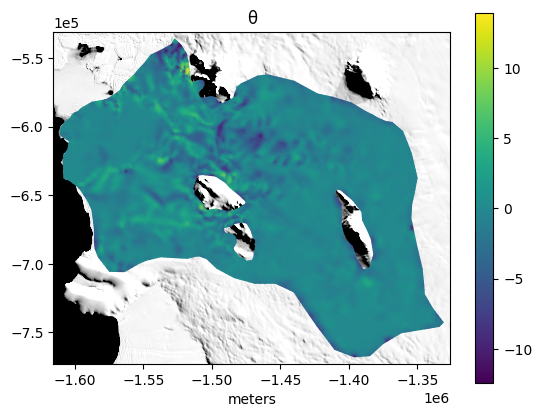

In [33]:
invert_dotson.plot_theta()